In [1]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import pyglet
from pyglet.gl import *

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import scipy.misc
from scipy import ndimage

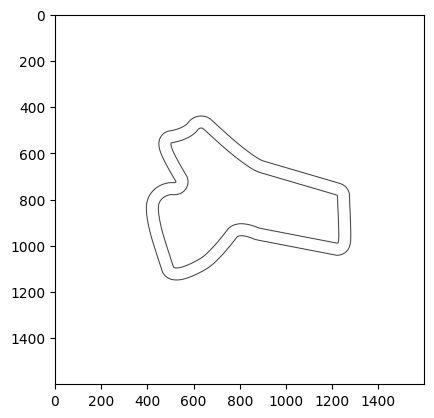

In [2]:
# Load map image
img = cv2.imread('General1_map.png')

imgplot = plt.imshow(img, cmap='gray')
plt.show()

In [3]:
# current batch that keeps track of all graphics
batch = pyglet.graphics.Batch()

# Load map image
map_img = np.array(Image.open('General1_map.png').transpose(Image.FLIP_TOP_BOTTOM)).astype(np.float64)
map_height = map_img.shape[0]
map_width = map_img.shape[1]

# Setup map metadata
map_resolution = 0.062500
origin_x = -78.21853769831466
origin_y = -44.37590462453829

# Convert map pixels to coordinates
range_x = np.arange(map_width)
range_y = np.arange(map_height)
map_x, map_y = np.meshgrid(range_x, range_y)
map_x = (map_x * map_resolution + origin_x).flatten()
map_y = (map_y * map_resolution + origin_y).flatten()
map_z = np.zeros(map_y.shape)
map_coords = np.vstack((map_x, map_y, map_z))

# mask and only leave the obstacle points
map_mask = map_img == 0.0
map_mask_flat = map_mask.flatten()
map_points = 50. * map_coords[:, map_mask_flat].T
for i in range(map_points.shape[0]):
    batch.add(1, GL_POINTS, None, ('v3f/stream', [map_points[i, 0], map_points[i, 1], map_points[i, 2]]), ('c3B/stream', [183, 193, 222]))
map_points = map_points

In [4]:
def coord_to_pixel(x, y):
    """Converts coordinates to pixel values
    """
    x = int((x - origin_x) / map_resolution)
    y = int((y - origin_y) / map_resolution)
    return x, y

In [5]:
start_pt_coord_x = 0
start_pt_coord_y = 0

start_pt_pix_x, start_pt_pix_y = coord_to_pixel(start_pt_coord_x, start_pt_coord_y)

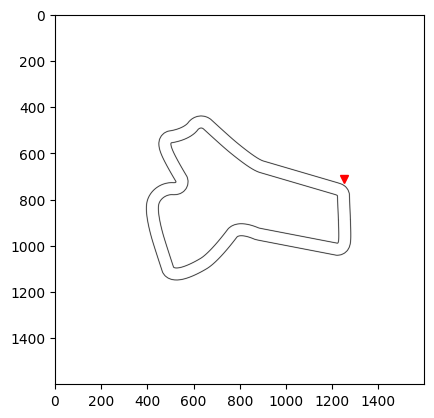

In [6]:
imgplot = plt.imshow(img, cmap='gray')
plt.plot(start_pt_pix_x, start_pt_pix_y, marker='v', color="red")
plt.show()

In [7]:
single5392_raw = pd.read_csv('collision_pts/single_weak_expert_seed5392_collision_pts.csv')

In [8]:
single5392_converted_pix = {'x':[], 'y':[]}
for idx, row in single5392_raw.iterrows():
    curr_x, curr_y = coord_to_pixel(row['collided_pose_x'], row['collided_pose_y'])
    single5392_converted_pix['x'].append(curr_x)
    single5392_converted_pix['y'].append(curr_y)

<function matplotlib.pyplot.show(close=None, block=None)>

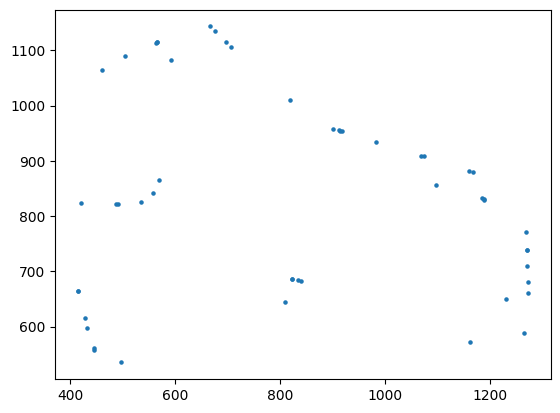

In [9]:
plt.scatter(single5392_converted_pix['x'], single5392_converted_pix['y'], s=5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

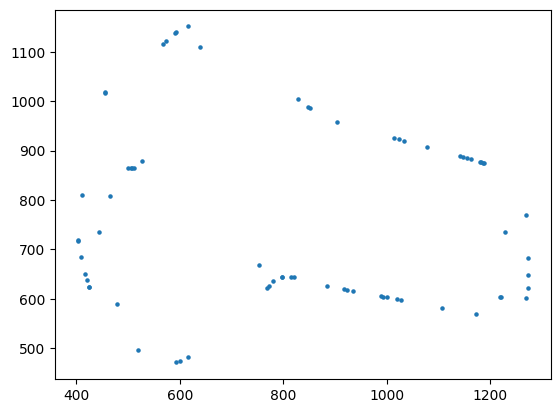

In [10]:
single4864_raw = pd.read_csv('collision_pts/single_weak_expert_seed4864_collision_pts.csv')
single4864_converted_pix = {'x':[], 'y':[]}
for idx, row in single4864_raw.iterrows():
    curr_x, curr_y = coord_to_pixel(row['collided_pose_x'], row['collided_pose_y'])
    single4864_converted_pix['x'].append(curr_x)
    single4864_converted_pix['y'].append(curr_y)
plt.scatter(single4864_converted_pix['x'], single4864_converted_pix['y'], s=5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

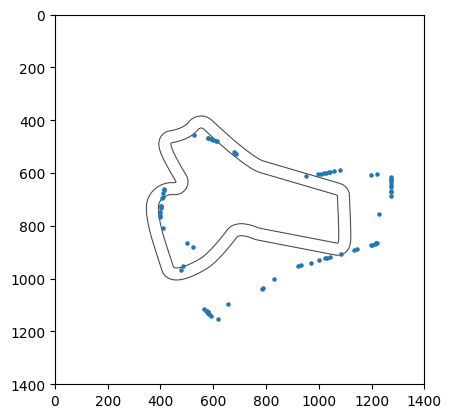

In [11]:
single5065_raw = pd.read_csv('collision_pts/single_weak_expert_seed5065_collision_pts.csv')
single5065_converted_pix = {'x':[], 'y':[]}
for idx, row in single5065_raw.iterrows():
    curr_x, curr_y = coord_to_pixel(row['collided_pose_x'], row['collided_pose_y'])
    single5065_converted_pix['x'].append(curr_x)
    single5065_converted_pix['y'].append(curr_y)
plt.scatter(single5065_converted_pix['x'], single5065_converted_pix['y'], s=5)

rot_img = ndimage.rotate(img, 0, reshape=False)
#resize_ratio = 0.8
#resize_ho = int(rot_img.shape[1]*resize_ratio)
#resize_ve = int(rot_img.shape[0]*resize_ratio)

#rot_img = cv2.resize(rot_img, [resize_ho, resize_ve], interpolation = cv2.INTER_AREA)
imgplot = plt.imshow(rot_img, cmap='gray', extent=[0, 1400, 1400, 0])

#plt.xlim(250, 1290)
#plt.ylim(250,1290)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

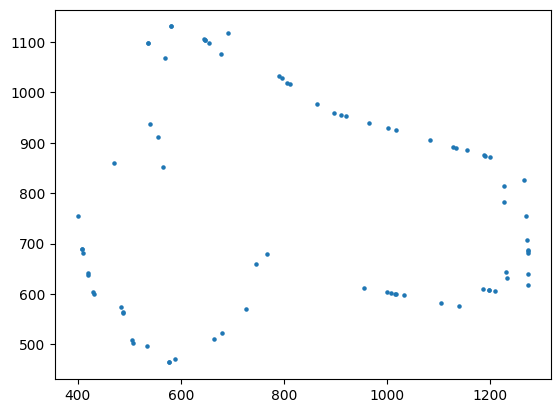

In [12]:
single6313_raw = pd.read_csv('collision_pts/single_weak_expert_seed6313_collision_pts.csv')
single6313_converted_pix = {'x':[], 'y':[]}
for idx, row in single6313_raw.iterrows():
    curr_x, curr_y = coord_to_pixel(row['collided_pose_x'], row['collided_pose_y'])
    single6313_converted_pix['x'].append(curr_x)
    single6313_converted_pix['y'].append(curr_y)
plt.scatter(single6313_converted_pix['x'], single6313_converted_pix['y'], s=5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

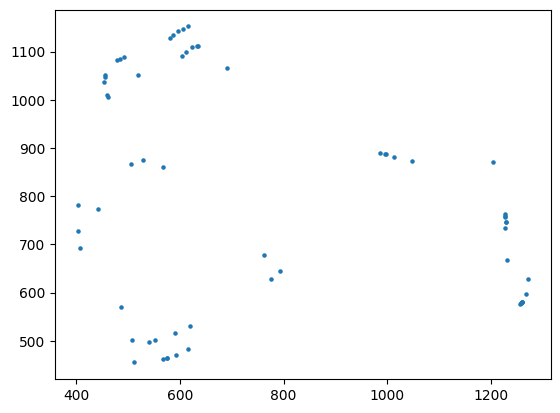

In [13]:
single7682_raw = pd.read_csv('collision_pts/single_weak_expert_seed7682_collision_pts.csv')
single7682_converted_pix = {'x':[], 'y':[]}
for idx, row in single7682_raw.iterrows():
    curr_x, curr_y = coord_to_pixel(row['collided_pose_x'], row['collided_pose_y'])
    single7682_converted_pix['x'].append(curr_x)
    single7682_converted_pix['y'].append(curr_y)
plt.scatter(single7682_converted_pix['x'], single7682_converted_pix['y'], s=5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

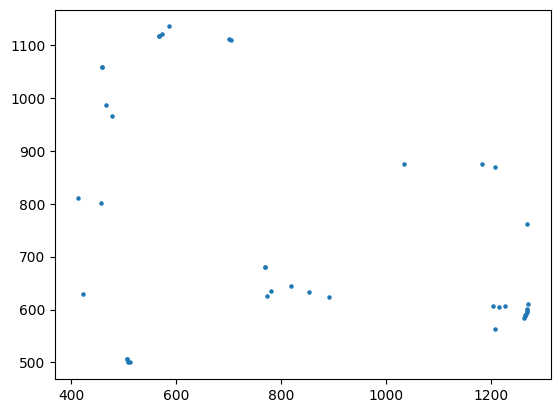

In [14]:
multi_raw = pd.read_csv('collision_pts/multi_weak_expert_collision_pts.csv')
multi_converted_pix = {'x':[], 'y':[]}
for idx, row in multi_raw.iterrows():
    curr_x, curr_y = coord_to_pixel(row['collided_pose_x'], row['collided_pose_y'])
    multi_converted_pix['x'].append(curr_x)
    multi_converted_pix['y'].append(curr_y)
plt.scatter(multi_converted_pix['x'], multi_converted_pix['y'], s=5)
plt.show

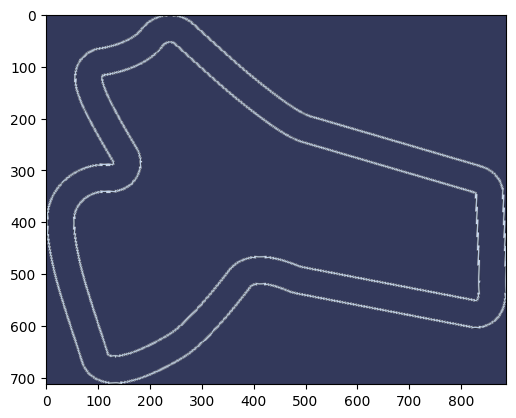

(713, 888, 3)


In [15]:
img_cropped = cv2.imread('map_cropped1.png')

img_cropped[np.all(img_cropped == (255, 255, 255), axis=-1)] = (51, 57,91)
img_cropped[np.all(img_cropped == (0, 0, 0), axis=-1)] = (196, 216,242)

imgplot = plt.imshow(img_cropped, cmap='viridis')
plt.show()

print(img_cropped.shape)

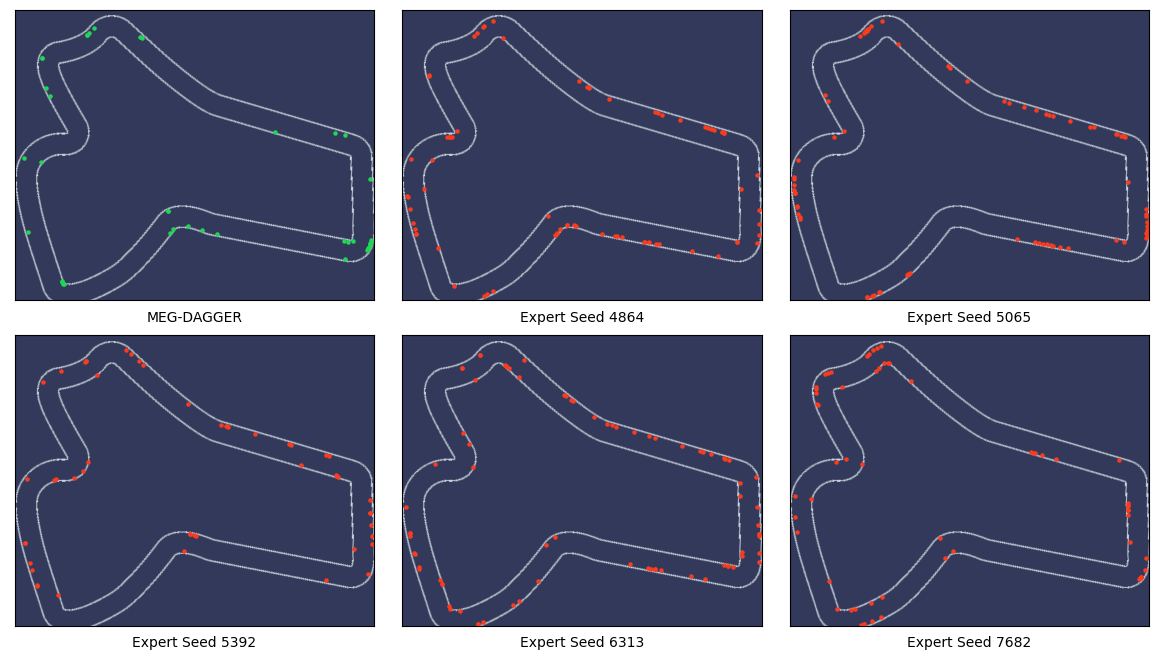

In [17]:
fig, axarr = plt.subplots(2, 3, figsize=(15, 8))
fig.subplots_adjust(wspace=0, hspace=0.12)
axarr[0, 0].scatter(multi_converted_pix['x'], multi_converted_pix['y'], s=5, c='#1fd655')
axarr[0, 1].scatter(single4864_converted_pix['x'], single4864_converted_pix['y'], s=5, c='#fb3b1e')
axarr[0, 2].scatter(single5065_converted_pix['x'], single5065_converted_pix['y'], s=5, c='#fb3b1e')
axarr[1, 0].scatter(single5392_converted_pix['x'], single5392_converted_pix['y'], s=5, c='#fb3b1e')
axarr[1, 1].scatter(single6313_converted_pix['x'], single6313_converted_pix['y'], s=5, c='#fb3b1e')
axarr[1, 2].scatter(single7682_converted_pix['x'], single7682_converted_pix['y'], s=5, c='#fb3b1e')

axarr[0, 0].set_facecolor('#33395B') 
axarr[0, 1].set_facecolor('#33395B') 
axarr[0, 2].set_facecolor('#33395B') 
axarr[1, 0].set_facecolor('#33395B') 
axarr[1, 1].set_facecolor('#33395B') 
axarr[1, 2].set_facecolor('#33395B') 

axarr[0,0].set_xticks([])
axarr[0,0].set_yticks([])
axarr[0,1].set_xticks([])
axarr[0,1].set_yticks([])
axarr[0,2].set_xticks([])
axarr[0,2].set_yticks([])
axarr[1,0].set_xticks([])
axarr[1,0].set_yticks([])
axarr[1,1].set_xticks([])
axarr[1,1].set_yticks([])
axarr[1,2].set_xticks([])
axarr[1,2].set_yticks([])

axarr[0,0].set_xlabel('MEG-DAGGER')
axarr[0,1].set_xlabel('Expert Seed 4864')
axarr[0,2].set_xlabel('Expert Seed 5065')
axarr[1,0].set_xlabel('Expert Seed 5392')
axarr[1,1].set_xlabel('Expert Seed 6313')
axarr[1,2].set_xlabel('Expert Seed 7682')

axarr[0,0].axis(xmin=390,xmax=1280, ymin=460, ymax=1180)
axarr[0,1].axis(xmin=390,xmax=1280, ymin=460, ymax=1180)
axarr[0,2].axis(xmin=390,xmax=1280, ymin=460, ymax=1180)
axarr[1,0].axis(xmin=390,xmax=1280, ymin=460, ymax=1180)
axarr[1,1].axis(xmin=390,xmax=1280, ymin=460, ymax=1180)
axarr[1,2].axis(xmin=390,xmax=1280, ymin=460, ymax=1180)

axarr_00_xlim = axarr[0,0].get_xlim()
axarr_00_ylim = axarr[0,0].get_ylim()
axarr_00_x_left = axarr_00_xlim[0]
axarr_00_x_right = axarr_00_xlim[1]
axarr_00_y_bottom = axarr_00_ylim[0]
axarr_00_y_top = axarr_00_ylim[1]
axarr[0,0].imshow(img_cropped, cmap='gray', extent=[axarr_00_x_left, axarr_00_x_right, axarr_00_y_bottom-15, axarr_00_y_top-15])

axarr_01_xlim = axarr[0,1].get_xlim()
axarr_01_ylim = axarr[0,1].get_ylim()
axarr_01_x_left = axarr_01_xlim[0]
axarr_01_x_right = axarr_01_xlim[1]
axarr_01_y_bottom = axarr_01_ylim[0]
axarr_01_y_top = axarr_01_ylim[1]
axarr[0,1].imshow(img_cropped, cmap='gray', extent=[axarr_01_x_left, axarr_01_x_right, axarr_01_y_bottom-15, axarr_01_y_top-15])

axarr_02_xlim = axarr[0,2].get_xlim()
axarr_02_ylim = axarr[0,2].get_ylim()
axarr_02_x_left = axarr_02_xlim[0]
axarr_02_x_right = axarr_02_xlim[1]
axarr_02_y_bottom = axarr_02_ylim[0]
axarr_02_y_top = axarr_02_ylim[1]
axarr[0,2].imshow(img_cropped, cmap='gray', extent=[axarr_02_x_left, axarr_02_x_right, axarr_02_y_bottom-15, axarr_02_y_top-15])

axarr_10_xlim = axarr[1,0].get_xlim()
axarr_10_ylim = axarr[1,0].get_ylim()
axarr_10_x_left = axarr_10_xlim[0]
axarr_10_x_right = axarr_10_xlim[1]
axarr_10_y_bottom = axarr_10_ylim[0]
axarr_10_y_top = axarr_10_ylim[1]
axarr[1,0].imshow(img_cropped, cmap='gray', extent=[axarr_10_x_left, axarr_10_x_right, axarr_10_y_bottom-15, axarr_10_y_top-15])

axarr_11_xlim = axarr[1,1].get_xlim()
axarr_11_ylim = axarr[1,1].get_ylim()
axarr_11_x_left = axarr_11_xlim[0]
axarr_11_x_right = axarr_11_xlim[1]
axarr_11_y_bottom = axarr_11_ylim[0]
axarr_11_y_top = axarr_11_ylim[1]
axarr[1,1].imshow(img_cropped, cmap='gray', extent=[axarr_11_x_left, axarr_11_x_right, axarr_11_y_bottom-15, axarr_11_y_top-15])

axarr_12_xlim = axarr[1,2].get_xlim()
axarr_12_ylim = axarr[1,2].get_ylim()
axarr_12_x_left = axarr_12_xlim[0]
axarr_12_x_right = axarr_12_xlim[1]
axarr_12_y_bottom = axarr_12_ylim[0]
axarr_12_y_top = axarr_12_ylim[1]
axarr[1,2].imshow(img_cropped, cmap='gray', extent=[axarr_12_x_left, axarr_12_x_right, axarr_12_y_bottom-15, axarr_12_y_top-15])
